In [1]:
import pandas as pd
import numpy as np

In [2]:
missing_values = ['n/a', 'na']
df_train = pd.read_csv('titanic/train.csv', na_values = missing_values)
df_test = pd.read_csv('titanic/test.csv')

# Leemos los datos

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
hist = df_train.hist(bins=20)

In [6]:
df_train['Title'] = df_train.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())
df_test['Title'] = df_test.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df_train.Title.loc[ (df_train.Title !=  'Master') & (df_train.Title !=  'Mr') & (df_train.Title !=  'Miss') 
             & (df_train.Title !=  'Mrs')] = 'Others'


df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df_test.Title.loc[ (df_test.Title !=  'Master') & (df_test.Title !=  'Mr') & (df_test.Title !=  'Miss') 
             & (df_test.Title !=  'Mrs')] = 'Others'

df_train = pd.concat([df_train, pd.get_dummies(df_train['Title'])], axis=1).drop(labels=['Name'], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Title'])], axis=1).drop(labels=['Name'], axis=1)

# create a new feature "Family"
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1


df_train.Family = df_train.Family.map(lambda x: 0 if x > 4 else x)
df_test.Family = df_test.Family.map(lambda x: 0 if x > 4 else x)

df_train['Fare-bin'] = pd.qcut(df_train.Fare,5,labels=[1,2,3,4,5]).astype(int)
df_test['Fare-bin'] = pd.qcut(df_test.Fare,5,labels=[1,2,3,4,5]).astype(int)

/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Limpiamos y procesamos los datos

In [7]:
def categorical_to_numerical(data_pd):
    data_pd['Sex'] = data_pd['Sex'].map({'male':0, 'female':1})
    data_pd['Embarked'] = data_pd['Embarked'].map({'C':0, 'Q':1, 'S':2})
    
    return data_pd

In [8]:
import pandas.api.types as ptypes

def test_categorical_to_numerical():
    df = pd.DataFrame({"PassengerId": [1, 2, 3],
                       "Sex": ['female', 'male', 'female'],
                       "Embarked": ['S', 'C', 'Q']}) #,
    
    df_cleaned = categorical_to_numerical(df)
    
    assert all(ptypes.is_numeric_dtype(df_cleaned[col]) for col in df_cleaned)
    # True
    # assert ptypes.is_string_dtype(df_cleaned['c'])
    # True
    # assert ptypes.is_datetime64_any_dtype(df_cleaned['d'])
    print(df_cleaned)

test_categorical_to_numerical()

   Embarked  PassengerId  Sex
0         2            1    1
1         0            2    0
2         1            3    1


In [9]:
def clean_data(data_pd):
    cleaned_data = data_pd.dropna(axis=0)
    
    return cleaned_data

In [10]:
def test_clean_data():
    df = pd.DataFrame({"PassengerId": [1, np.nan, 3],
                       "Sex": [None, 'male', 'female'],
                       "Embarked": ['B', 'C', 'Q'],
                        "hola": ['a', 'b', 'c']})
    
    df_cleaned = clean_data(df)
    assert df_cleaned.isna().any().any() == False
    
    print (df_cleaned)

test_clean_data()

  Embarked  PassengerId     Sex hola
2        Q          3.0  female    c


In [11]:
def remove_duplicate_values(data_pd):
    return data_pd.drop_duplicates(keep='first', inplace=False)

In [21]:
def test_remove_duplicate_values():
    df = pd.DataFrame({"PassengerId": [1, 2, 3, 3],
                       "Sex": ['male', 'male', 'female', 'female'],
                       "Embarked": ['B', 'C', 'Q', 'Q']})
    
    df_cleaned = remove_duplicate_values(df)
    assert (any(df_cleaned.duplicated())) == False
    
    print(df_cleaned)
    
test_remove_duplicate_values()

  Embarked  PassengerId     Sex
0        B            1    male
1        C            2    male
2        Q            3  female


In [13]:
df_train = categorical_to_numerical(df_train)
df_test = categorical_to_numerical(df_test)

df_train = clean_data(df_train)

In [14]:
df_train = df_train.drop(columns=['Title', 'Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Pclass', 'SibSp', 'Parch'])
df_test = df_test.drop(columns=['Title','Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Pclass', 'SibSp', 'Parch'])

# Matriz de correlacion

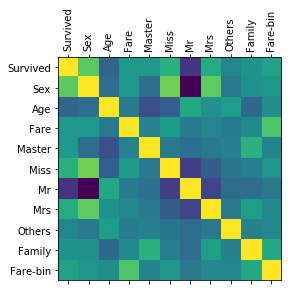

In [15]:
import matplotlib.pyplot as plt

plt.matshow(df_train.corr())
tick_marks = [i for i in range(len(df_train.columns))]
plt.xticks(tick_marks, df_train.columns, rotation='vertical')
plt.yticks(tick_marks, df_train.columns)
plt.show()

In [16]:
df_train.head()

,Survived,Sex,Age,Fare,Master,Miss,Mr,Mrs,Others,Family,Fare-bin
1,1,1,38.0,71.2833,0,0,0,1,0,2,5
3,1,1,35.0,53.1000,0,0,0,1,0,2,5
6,0,0,54.0,51.8625,0,0,1,0,0,1,5
10,1,1,4.0,16.7000,0,1,0,0,0,3,3
11,1,1,58.0,26.5500,0,1,0,0,0,1,4


# Create architecture with TF

In [17]:
import tensorflow as tf

In [26]:
#variables
y_train = df_train['Survived']
x_train = df_train.drop(columns=['Survived'])
feature_vector_length = x_train.shape[1]
feature_vector_length

10

In [30]:
# placeholders
x = tf.placeholder(tf.float32, [None, feature_vector_length])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 1])
x

<tf.Tensor 'Placeholder_7:0' shape=(?, 10) dtype=float32>

In [31]:
# Build Neural Network
from collections import namedtuple

def build_neural_network(inputs, labels, hidden_units=10):
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network(inputs=x, labels=y)

# Unit test conv

In [ ]:
def make_convnet(input_image):
    net = slim.conv2d(input_image, 32, [11, 11], scope="conv1_11x11")
    net = slim.conv2d(input_image, 64, [5, 5], scope="conv2_5x5")
    net = slim.max_pool2d(net, [4, 4], stride=4, scope='pool1')
    net = slim.conv2d(input_image, 64, [5, 5], scope="conv3_5x5")
    net = slim.conv2d(input_image, 128, [3, 3], scope="conv4_3x3")
    net = slim.max_pool2d(net, [2, 2], scope='pool2')
    net = slim.conv2d(input_image, 128, [3, 3], scope="conv5_3x3")
    net = slim.max_pool2d(net, [2, 2], scope='pool3')
    net = slim.conv2d(input_image, 32, [1, 1], scope="conv6_1x1")
    return net

In [ ]:
def test_convnet():
  image = tf.placeholder(tf.float32, (None, 100, 100, 3)
  model = Model(image)
  sess = tf.Session()
  sess.run(tf.global_variables_initializer())
  before = sess.run(tf.trainable_variables())
  _ = sess.run(model.train, feed_dict={
               image: np.ones((1, 100, 100, 3)),
               })
  after = sess.run(tf.trainable_variables())
  for b, a, n in zip(before, after):
      # Make sure something changed.
      assert (b != a).any()